<a href="https://colab.research.google.com/github/aminik/projects_GoogleColab/blob/main/model_nn_transaction_huggingface_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Field preporation

In [30]:
for lib_name in  ["tensorflow" ,"transformers", "torch", "evaluate", "requests", "kaggle"]:
  !pip list | grep -i {lib_name}

tensorflow                         2.17.1
tensorflow-datasets                4.9.7
tensorflow-hub                     0.16.1
tensorflow-io-gcs-filesystem       0.37.1
tensorflow-metadata                1.13.1
tensorflow-probability             0.24.0
sentence-transformers              3.3.1
transformers                       4.47.1
torch                              2.5.1+cu121
torchaudio                         2.5.1+cu121
torchsummary                       1.5.1
torchvision                        0.20.1+cu121
evaluate                           0.4.3
requests                           2.32.3
requests-oauthlib                  1.3.1
requests-toolbelt                  1.0.0
kaggle                             1.6.17
kagglehub                          0.3.6


not exists library evalute

In [31]:
## connect to GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

### LIBS

Для доступа к моделям есть два способа:

Прямое использование моделей на исходном фреймворке — больше кода, но и больше гибкости.

Класс Pipeline — самый простой способ воспользоваться моделями из transformers. С него и начнем.

In [3]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [4]:
!pip install datasets

In [6]:
import transformers
import evaluate

# all metrcics takes from https://huggingface.co/evaluate-metric

# from transformers import pipeline

In [28]:
for mtrc in evaluate.list_evaluation_modules():
  if mtrc.find('f1') != -1:
    print(mtrc)

In [24]:
mtrc.find('f1')

-1

In [34]:
# https://huggingface.co/spaces/evaluate-metric/f1
mtrc_f1 = evaluate.load(path='f1') #evaluate.load(module_name='f1')

Для доступа к моделям есть два способа:

- Прямое использование моделей на исходном фреймворке — больше кода, но и больше гибкости.

- Класс Pipeline — самый простой способ воспользоваться моделями из transformers. С него и начнем.

## ` Использование  модели  через класс  Pipeline`

In [40]:
from transformers import pipeline

In [44]:
hf_task = 'text-classification' # https://huggingface.co/tasks/text-classification
hf_model_name = 's-nlp/russian_toxicity_classifier' # https://huggingface.co/s-nlp/russian_toxicity_classifier
clf = pipeline( task = hf_task, model=hf_model_name,
               # можно добавить не родной токиназер
                tokenizer='bert-base-cased'
                )

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cpu


In [45]:
text = ['У нас в есть убунты и текникал превью.',
    	'Как минимум два малолетних дегенерата в треде, мда.']

clf(text,
    #По умолчанию классификатор возвращает наиболее вероятный класс, но вы можете вернуть и все значения
		   top_k=None)

[[{'label': 'neutral', 'score': 0.9900795221328735},
  {'label': 'toxic', 'score': 0.00992051512002945}],
 [{'label': 'neutral', 'score': 0.9942336678504944},
  {'label': 'toxic', 'score': 0.005766342859715223}]]

 Что тут можно улучшить:

Помимо конкретной модели в pipeline можно передать tokenizer. Токенайзер используется в NLP задачах и отвечает за предварительную обработку текста и конвертирует их в массив чисел, которые затем поступают на вход модели (об этом подробнее ниже).

Обычно для модели используется точно такой же tokenizer, который использовался при обучении (только так можно гарантировать корректность ее работы). Но если по каким-либо причинам вам потребовался другой, то его можно задать примерно так:             
              

Если все данные, которые нужно обработать, не влазят в память, то можно задействовать генератор, который будет поштучно загружать данные в память и подавать их в модель:

In [ ]:
def data(text):
    for row in text:
        yield row

for out in clf(data(text)):
    print(out)

## ` Использование  модели  через PyTorch`


In [2]:
import torch
import requests
from PIL import Image
from io import BytesIO
# Binary I/O (also called buffered I/O) expects bytes-like objects and produces bytes objects.
# No encoding, decoding, or newline translation is performed.
# This category of streams can be used for all kinds of non-text data,
# and also when manual control over the handling of text data is desired.

from transformers import AutoImageProcessor, AutoModelForImageClassification

In [3]:
response = requests.get(
    'https://github.com/laxmimerit/dog-cat-full-dataset/blob/master/data/train/cats/cat.10055.jpg?raw=true')
img = Image.open(BytesIO(response.content))


In [4]:
response.content

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01\x93\x01\xf3\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe

In [5]:
BytesIO(response.content)

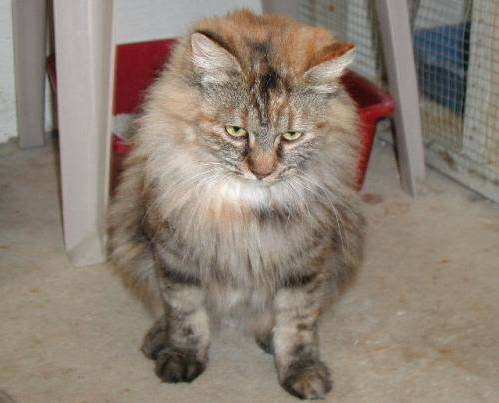

In [50]:
img

In [6]:
hf_model_name = 'google/vit-base-patch16-224'
# https://huggingface.co/google/vit-base-patch16-224
img_proc = AutoImageProcessor.from_pretrained(hf_model_name)
# ImageProcessor. Это аналог токенайзера, но только для картинок — выравнивает размеры картинок, нормализует и т.д. (об ImageProcessor чуть подробнее ниже).
# В предыдущем варианте предобработкой занимался сам Pipeline где-то в своих недрах. Сейчас же нам придется заниматься этим самостоятельно.
model = AutoModelForImageClassification.from_pretrained(hf_model_name)
# Сама модель представляет собой PyTorch nn.Module, который вы можете использовать как обычно при работе с торчом.


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [7]:
# Обрабатываем картинку посредством ImageProcessor. ImageProcessor возвращает словарь, который подаем на вход модели с оператором распаковки (**).
inputs = img_proc(img, return_tensors='pt')


In [8]:
inputs

{'pixel_values': tensor([[[[ 0.4275,  0.4275,  0.4196,  ...,  0.0902,  0.1216,  0.0667],
          [ 0.4353,  0.4353,  0.4118,  ...,  0.0902,  0.0510,  0.0118],
          [ 0.4353,  0.4275,  0.4039,  ...,  0.1686,  0.1059,  0.0510],
          ...,
          [-0.1373, -0.0745, -0.0431,  ...,  0.2941,  0.2941,  0.2627],
          [-0.1529, -0.1137, -0.0588,  ...,  0.2784,  0.2706,  0.2627],
          [-0.1529, -0.1294, -0.0745,  ...,  0.2706,  0.2471,  0.2392]],

         [[ 0.4275,  0.4431,  0.4588,  ...,  0.0275,  0.0588,  0.0588],
          [ 0.4431,  0.4510,  0.4510,  ...,  0.0275, -0.0039,  0.0039],
          [ 0.4431,  0.4431,  0.4431,  ...,  0.1059,  0.0431,  0.0275],
          ...,
          [-0.2392, -0.1765, -0.1451,  ...,  0.1922,  0.1922,  0.1765],
          [-0.2549, -0.2157, -0.1608,  ...,  0.1765,  0.1765,  0.1922],
          [-0.2549, -0.2314, -0.1765,  ...,  0.1686,  0.1529,  0.1765]],

         [[ 0.4431,  0.4510,  0.4275,  ..., -0.0902, -0.0745, -0.0980],
          [ 0

In [16]:
# словарь, который подаем на вход модели с оператором распаковки (**).
# Transformers возвращают логиты, которые идут перед последней функцией активации (например, softmax). Соответственно, нам самим необходимо их обработать, чтобы получить на выходе вероятность или класс.
# https://pytorch.org/docs/stable/generated/torch.no_grad.html
with torch.no_grad(): #It will reduce memory consumption Context-manager that disables gradient calculation.
    logits = model(**inputs).logits
# model.config


In [10]:
{each : model.config.id2label[each] for  each in  model.config.id2label.keys() if each <5}

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark'}

In [56]:
predicted_id = logits.argmax(-1).item()
predicted_label = model.config.id2label[predicted_id]
print(predicted_id, '-', predicted_label)

281 - tabby, tabby cat


Автоматическое определение архитектуры
Для каждой архитектуры и каждой задачи под нее есть свой специальный именной класс. Например: BertForSequenceClassification, GPT2ForSequenceClassification, RobertaForSequenceClassification и т.д. Также и для их предобработчиков: BertTokenizer, .GPT2Tokenizer и т.д.

Чтобы каждый раз не заморачиваться с определением точного названия класса в Transformers завезли так называемый AutoClass. AutoClass позволяет автоматически считывать всю метаинформацию (архитектуру и пр.) из предварительно обученной модели при ее загрузке:

In [ ]:
img_proc = AutoImageProcessor.from_pretrained(
    'google/vit-base-patch16-224')
model = AutoModelForImageClassification.from_pretrained(
    'google/vit-base-patch16-224')

tokenizer = AutoTokenizer.from_pretrained(
    'SkolkovoInstitute/russian_toxicity_classifier')
model = AutoModelForSequenceClassification.from_pretrained(
    'SkolkovoInstitute/russian_toxicity_classifier')

Каждый автокласс привязан к определенной задаче. С полным списком автоклассов можете ознакомится здесь: https://huggingface.co/docs/transformers/main/en/model_doc/auto

Если вы обучаете модель с нуля, то вам нужно импортировать точный конечный класс.

Дообучение
Не часто вам потребуются модели как есть. В соревнованиях, а тем более в работе вам скорее всего придется дообучить модель на своем датасете. И тут вас есть несколько вариантов…

## Дообучение
несколько вариантов…
### 1 Trainer
классом Trainer. Это аналог Pipline’а. Только он предназначен для организации упрощенного процесса обучения.

In [25]:
import datasets
import evaluate
import pandas as pd
import numpy as np
from datasets import Dataset
from sklearn.model_selection import train_test_split
from transformers import (AutoTokenizer, AutoModelForSequenceClassification,
                          TrainingArguments, Trainer)


In [41]:
import kagglehub

# Download latest version https://www.kaggle.com/datasets/blackmoon/russian-language-toxic-comments/data
path = kagglehub.dataset_download("blackmoon/russian-language-toxic-comments")

print("Path to dataset files:", path)

!ls {path}

Path to dataset files: /root/.cache/kagglehub/datasets/blackmoon/russian-language-toxic-comments/versions/1
labeled.csv


In [40]:

# Загружаем данные
df = pd.read_csv(os.path.join(path, 'labeled.csv'))
df.columns = ['text','label']
df['label'] = df['label'].astype(int)


In [48]:
df = df.head(100).copy()

In [49]:

# Конвертируем датафрейм в Dataset
train, test = train_test_split(df, test_size=0.3)
train = Dataset.from_pandas(train)
test = Dataset.from_pandas(test)

# Выполняем предобработку текста
tokenizer = AutoTokenizer.from_pretrained(
    'SkolkovoInstitute/russian_toxicity_classifier')


In [50]:

def tokenize_function(examples):
	return tokenizer(examples['text'], padding='max_length', truncation=True)

tokenized_train = train.map(tokenize_function)
tokenized_test = test.map(tokenize_function)


Map:   0%|          | 0/70 [00:00<?, ? examples/s]

Map:   0%|          | 0/30 [00:00<?, ? examples/s]

In [44]:

# Загружаем предобученную модель
model = AutoModelForSequenceClassification.from_pretrained(
	'SkolkovoInstitute/russian_toxicity_classifier',
	num_labels=2)


config.json:   0%|          | 0.00/1.04k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/711M [00:00<?, ?B/s]

In [51]:

# Задаем параметры дообучения
# Определяем экземпляр класса TrainingArguments. В класс универсальный и предназначен для обучения разных архитектур и задач, то параметров у него довольно много
# https://huggingface.co/docs/transformers/main_classes/trainer#transformers.TrainingArguments
training_args = TrainingArguments(
	output_dir = 'test_trainer_log', # The output directory where the model predictions and checkpoints will be written.
	evaluation_strategy = 'epoch',
# 	he evaluation strategy to adopt during training. Possible values are:
# "no": No evaluation is done during training.
# "steps": Evaluation is done (and logged) every eval_steps.
# "epoch": Evaluation is done at the end of each epoch.
	per_device_train_batch_size = 6,  # The batch size per GPU/XPU/TPU/MPS/NPU core/CPU for training.
	per_device_eval_batch_size = 6, # The batch size per GPU/XPU/TPU/MPS/NPU core/CPU for evaluation.
	num_train_epochs = 5, #   Total number of training epochs to perform (if not an integer, will perform the decimal part percents of the last epoch before stopping training).

 # can set comet
 report_to='none') # The list of integrations to report the results and logs to. Supported platforms are "azure_ml", "clearml", "codecarbon", "comet_ml", "dagshub", "dvclive", "flyte", "mlflow", "neptune", "tensorboard", and "wandb". Use "all" to report to all integrations installed, "none" for no integrations.

# Определяем как считать метрику
metric = evaluate.load('f1')
def compute_metrics(eval_pred):
	logits, labels = eval_pred
	predictions = np.argmax(logits, axis=-1)
	return metric.compute(predictions=predictions, references=labels)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [52]:
# Создаем объект Trainer и подгружаем в него все ранее определенные компоненты: модель, аргументы, датасеты, функцию оценки. И запускаем обучение.
# Выполняем обучение
trainer = Trainer(
	model = model,
	# Задаем параметры дообучения
	args = training_args,
	train_dataset = tokenized_train,
	eval_dataset = tokenized_test,
	compute_metrics = compute_metrics)

trainer.train()

# Сохраняем модель
save_directory = './pt_save_pretrained'
#tokenizer.save_pretrained(save_directory)
model.save_pretrained(save_directory)
#alternatively save the trainer
#trainer.save_model('CustomModels/CustomHamSpam')
# . Не забываем что все модели возвращают логиты, которые необходимо соответствующим образом преобразовать.

Epoch,Training Loss,Validation Loss,F1
1,No log,0.477315,0.905660
2,No log,0.165243,0.978723


Epoch,Training Loss,Validation Loss,F1
1,No log,0.477315,0.905660
2,No log,0.165243,0.978723
3,No log,0.168233,0.941176
4,No log,0.320391,0.941176
5,No log,0.283049,0.941176


In [ ]:
# загрузить нашу модел
# Trainer поддерживает поиск гиперпараметров посредством специализированных пакетов: optuna, sigopt, raytune и wandb. Более подрбно: https://huggingface.co/docs/transformers/hpo_train
model = AutoModelForSequenceClassification.from_pretrained(
	'./pt_save_pretrained')

###  PyTorch


In [5]:
import torch
import evaluate
import pandas as pd
from tqdm.auto import tqdm
from datasets import Dataset
from torch.optim import AdamW
# https://pytorch.org/docs/stable/generated/torch.optim.AdamW.html
from torch.utils.data import DataLoader
# https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader  Data loader combines a dataset and a sampler, and provides an iterable over the given dataset.
from sklearn.model_selection import train_test_split
from transformers import (AutoTokenizer,
                          AutoModelForSequenceClassification, get_scheduler)


In [8]:
import os

In [6]:
import kagglehub

# Download latest version https://www.kaggle.com/datasets/blackmoon/russian-language-toxic-comments/data
path = kagglehub.dataset_download("blackmoon/russian-language-toxic-comments")

print("Path to dataset files:", path)

!ls {path}

100%|██████████| 1.49M/1.49M [00:00<00:00, 21.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/blackmoon/russian-language-toxic-comments/versions/1
labeled.csv


In [47]:

# Загружаем данные
df = pd.read_csv(os.path.join(path, 'labeled.csv'), index_col=False )
df.columns = ['text','label']
df['label'] = df['label'].astype(int)

df.reset_index(names="index_level_0")

,index_level_0,text,label
0,0,"Верблюдов-то за что? Дебилы, бл...\n",1
1,1,"Хохлы, это отдушина затюканого россиянина, мол...",1
2,2,Собаке - собачья смерть\n,1
3,3,"Страницу обнови, дебил. Это тоже не оскорблени...",1
4,4,"тебя не убедил 6-страничный пдф в том, что Скр...",1
...,...,...,...
14407,14407,Вонючий совковый скот прибежал и ноет. А вот и...,1
14408,14408,А кого любить? Гоблина тупорылого что-ли? Или ...,1
14409,14409,"Посмотрел Утомленных солнцем 2. И оказалось, ч...",0
14410,14410,КРЫМОТРЕД НАРУШАЕТ ПРАВИЛА РАЗДЕЛА Т.К В НЕМ Н...,1


In [36]:
df.columns

Index(['text', 'label'], dtype='object')

In [48]:


# Конвертируем датафрейм в Dataset
train, test = train_test_split(df, test_size=0.2)
train = Dataset.from_pandas(train)
test = Dataset.from_pandas(test)


In [43]:

# Выполняем предобработку текста
tokenizer = AutoTokenizer.from_pretrained('SkolkovoInstitute/russian_toxicity_classifier')
# https://huggingface.co/s-nlp/russian_toxicity_classifier >> BertTokenizer

In [12]:
tokenizer

BertTokenizerFast(name_or_path='SkolkovoInstitute/russian_toxicity_classifier', vocab_size=100792, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

In [50]:

def tokenize_function(examples):
	# https://huggingface.co/docs/transformers/v4.48.0/en/model_doc/auto#transformers.AutoTokenizer
	# BertTokenizer
	# https://huggingface.co/docs/transformers/model_doc/bert#transformers.TFBertTokenizer
	return tokenizer(examples['text'],
	                 padding='max_length', # The type of padding to use. Can be either "longest", to pad only up to the longest sample in the batch, or `“max_length”, to pad all inputs to the maximum length supported by the tokenizer.
									 truncation=True # Whether to truncate the sequence to the maximum length.
									         )

def ds_preproc(ds):
	ds = ds.map(tokenize_function)
	ds = ds.remove_columns(['text', '__index_level_0__'])
	ds = ds.rename_column('label', 'labels')
	ds.set_format('torch')
	return ds


In [51]:

tokenized_train = ds_preproc(train)
tokenized_test = ds_preproc(test)

# Создаем даталоадер
train_dataloader = DataLoader(tokenized_train, shuffle=True, #set to True to have the data reshuffled at every epoch
                              batch_size=8)
test_dataloader = DataLoader(tokenized_test, batch_size=8) # how many samples per batch to load


Map:   0%|          | 0/11529 [00:00<?, ? examples/s]

Map:   0%|          | 0/2883 [00:00<?, ? examples/s]

In [52]:

# Загружаем модель и указываем кол-во классов
model = AutoModelForSequenceClassification.from_pretrained(
	'SkolkovoInstitute/russian_toxicity_classifier',
	num_labels=2)


config.json:   0%|          | 0.00/1.04k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/711M [00:00<?, ?B/s]

In [53]:

# Задаем оптимайзер и шедулер
optimizer = AdamW(model.parameters(), lr=5e-6)

num_epochs = 5
num_training_steps = num_epochs * len(train_dataloader)

lr_scheduler = get_scheduler(
	name = 'linear',
	optimizer = optimizer,
	num_warmup_steps = 0,
	num_training_steps = num_training_steps)


In [57]:

device = 'cpu'
model.to(device)


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [ ]:

# Выполняем цикл...
for epoch in tqdm(range(num_epochs)):
  #... обучения
  model.train()
  for batch in tqdm(train_dataloader, leave=False):
    batch = {k: v.to(device) for k, v in batch.items()}
    outputs = model(**batch)
    loss = outputs.loss
    loss.backward()
    optimizer.step()
    lr_scheduler.step()
    optimizer.zero_grad()

	#... оценки
  metric = evaluate.load('f1')

  model.eval()
  for batch in tqdm(test_dataloader, leave=False):
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)

    metric.add_batch(predictions=predictions, references=batch['labels'])

  print(f'epoch {epoch} -', metric.compute())


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1442 [00:00<?, ?it/s]

In [ ]:

# Сохраняем модель
save_directory = './pt_save_pretrained'
model.save_pretrained(save_directory)